<img src="images/logoitam.gif">

# Maestría en Ciencia de Datos
## Filtro de Spam | Bayes Ingenuo Contínuo
* Machine Learning | Tarea 02 | 25 de agosto de 2016 |
* Alumna: Gabriela Flores Bracamontes |  Clave: 160124 |

### Objetivo:
Obtener un método de clasificación utilizando Bayes Ingenuo Contínuo que nos permita determinar si un correo es spam o no.

### Descripción de los datos:
- La base de datos de Spam del repositorio de Aprendizaje Máquina de la UCI en  la siguiente ruta:
+ https://archive.ics.uci.edu/ml/datasets/Spambase

```
- Ánálisis de los datos
+ Número de instancias: 4601
+ 58 atributos:
    * 48 continuous real [0,100] de frecuencia de palabras
    * 6 continuous real [0,100] de frecuencia de caracteres
    * 1 continuous real [1,...]
    * 1 continuous integer [1,...]
    * 1 continuous integer [1,...]
    * 1 nominal {0,1}, 1 si es spam, 0 si no lo es.
+ Datos faltantes en los datos.
```

### Bibliografía
- http://radimrehurek.com/data_science_python/
- http://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

## El proceso a seguir es
<img src="images/NaivesBayesContinous.png">

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn import metrics


import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
#import seaborn

In [2]:
def ClasificadorBayesianoContinuo(x):
    Spam=np.log(P_Spam)
    sumaSpam=0.0
    sumaNSpam=0.0
    noSpam=np.log(P_NoSpam)
    for i in range(len(VarSpam[0])):
        if mediaS[i]!= 0.0 and dsS[i]>0.0:
            sumaSpam+= np.log(norm(mediaS[i],dsS[i]).pdf(x[i]))

    for i in range(len(VarSpam[1])):
        if mediaNS[i]!= 0.0 and dsNS[i]>0.0:
            sumaNSpam+= np.log(norm(mediaNS[i],dsNS[i]).pdf(x[i]))
            
    Spam+= sumaSpam
    noSpam+= sumaNSpam

    if Spam > noSpam:
        return 1
    else:
        return 0

def GraficarCurvaRoc(Y_test, Y_pred):
        # Graficamos la curva ROC
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fpr, tpr, lw=2, label='Roc Curve NaiveBayes', color='darkblue')
    plt.axis([-0.4, 1.05, -0.05, 1.05])
    for x in range(0,len(thresholds),100):
        a = round(thresholds[x],2)
        b = [fpr[x],tpr[x]]
        ax.annotate('(%s)' % a,xy=b,size='small', color='gray')
    plt.title("Roc Curve Naive Bayes", color='darkred')
    plt.plot([-.05, 1.5], [-.05, 1.5], '--', color=(.6, .6, .6), label='Barrera')
    plt.xlabel('FP', color='black')
    plt.ylabel('TP', color="black")
    plt.legend(loc="upper left")
    plt.show()
    print('threshauc',metrics.auc(fpr, tpr))

## 1.- Descargo la base y la importo en un DataFrame

In [3]:
df = pd.read_csv("02 spambase.csv", header=None)

## 2.- Divido mis datos en entrenamiento y de  prueba

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]], df[df.columns[-1]], train_size=0.75)

#### Probabilidad de que sea spam

In [6]:
P_Spam= float(sum(Y_train)/len(Y_train))
P_Spam

0.39594202898550723

#### Probabilidad de que no sea spam

In [7]:
P_NoSpam= 1 - P_Spam
P_NoSpam

0.6040579710144928

#### Convierto los dataframes en arreglos

In [8]:
X_train= np.array(X_train)
Y_train= np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

#### Separo los datos de la muestra en spam

In [9]:
VarSpam = np.array([X_train[i] for i in range(len(X_train)) if Y_train[i]==1])

In [10]:
VarNoSpam = np.array([X_train[i] for i in range(len(X_train)) if Y_train[i]==0])

In [11]:
VarSpam

array([[  0.00000000e+00,   2.90000000e-01,   8.70000000e-01, ...,
          5.02000000e+00,   1.32000000e+02,   9.79000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.47000000e+00,   4.10000000e+01,   5.04000000e+02],
       [  1.30000000e-01,   2.70000000e-01,   8.30000000e-01, ...,
          2.32900000e+00,   1.50000000e+01,   2.19000000e+02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.13300000e+00,   1.70000000e+01,   6.20000000e+01],
       [  1.80000000e-01,   0.00000000e+00,   9.00000000e-02, ...,
          4.19200000e+00,   4.80000000e+01,   5.66000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.10000000e+00,   2.50000000e+01,   8.20000000e+01]])

### Para cada variable calcular P(X|Spam)

In [12]:
mediaS=np.mean(X_train[Y_train==1],0)
dsS=np.std (X_train[Y_train==1],0)
mediaNS=np.mean(X_train[Y_train==0],0)
dsNS=np.std(X_train[Y_train==0],0)

## Detectando Spam

In [13]:
Y_pred= [ClasificadorBayesianoContinuo(x) for x in X_test]   

## Evaluando

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8262380538662033

In [15]:
confusion_matrix(Y_test, Y_pred)

array([[518, 186],
       [ 14, 433]])

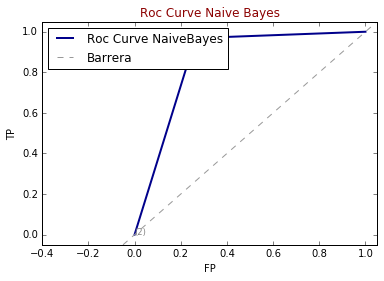

threshauc 0.852237772015


In [16]:
GraficarCurvaRoc(Y_test, Y_pred)

In [17]:
sum(Y_test)

447

## Usando librerías predefinidas

In [18]:
gnb = GaussianNB()
modelo=gnb.fit(X_train, Y_train)

## Predecimos

In [19]:
Y_pred= modelo.predict(X_test)

In [20]:
confusion_matrix(Y_test, Y_pred)

array([[515, 189],
       [ 14, 433]])

In [21]:
accuracy_score(Y_test, Y_pred)

0.82363162467419637

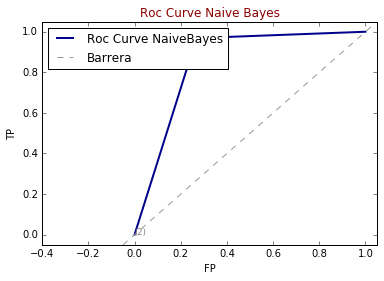

threshauc 0.850107090197


In [22]:
GraficarCurvaRoc(Y_test, Y_pred)